In [79]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import is3_broker_rl
import matplotlib.pyplot as plt
from pathlib import Path

In [80]:
DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [81]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = ""
COMMENTS = ""


In [82]:
print(COMMENTS)

In [83]:
#path = "../data/"
reward_prefix = "wholesale_reward.csv"

In [84]:
ANALYSIS_DIR = DATA_DIR / ANALYSIS_DIR_NAME

### Reward analysis

In [85]:
df_reward = pd.read_csv(os.path.join(ANALYSIS_DIR,reward_prefix))


In [86]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [87]:
def min_max_scaler(series):
    return (series - series.min()) / (series.max() - series.min())

In [88]:

df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

temp_merge_df = pd.DataFrame()
temp_name = []
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        temp_df2 = temp_df[column].apply(pd.Series)
        i=0
        for column2 in temp_df2:
            temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
            i+=1
            
        
    else:
        temp_merge_df[column] = temp_df[column]
    
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")




/tmp/ipykernel_6880/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_6880/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
/tmp/ipykernel_6880/1597897593.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a 

In [89]:
df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names
action_observation_reward_df = pd.concat([df_action,temp_merge_df, df_reward[["reward", "balancing_reward", "wholesale_reward","shaped_return","sum_mWh", "tariff_reward"]]],axis=1)
write_unique_game_id(action_observation_reward_df)
df = action_observation_reward_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9708 entries, 0 to 9707
Columns: 353 entries, energy_1 to tariff_reward
dtypes: float64(350), int64(2), object(1)
memory usage: 26.1+ MB


In [90]:
#df = df.iloc[2200:2500]

In [91]:
df[df["customer_count"].shift(1) -df["customer_count"] > 8000 | (df["customer_count"].shift(1) -df["customer_count"] < 8000)]["customer_count"]

18      55088
24      53306
30      52911
65      54983
71      53289
        ...  
9626    53746
9632    52898
9638    52139
9644    51599
9704    55173
Name: customer_count, Length: 745, dtype: int64

In [92]:
df.iloc[5300:8000][["customer_count","reward","balancing_reward", "wholesale_reward","shaped_return","customer_count"]].tail(5)

,customer_count,reward,balancing_reward,wholesale_reward,shaped_return,customer_count
7995,56502,-130.120887,-0.077636,-0.003282,-0.239469,56502
7996,56502,-131.150284,-0.036350,-0.006140,-0.744914,56502
7997,56628,-133.949540,0.000808,0.019745,-0.012936,56628
7998,56628,-134.755688,-0.026735,0.001694,-0.651122,56628
7999,56628,-133.899678,-0.113256,0.014386,-1.189520,56628


In [93]:
df

,energy_1,price_1,energy_2,price_2,energy_3,price_3,energy_4,price_4,energy_5,price_5,...,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,reward,balancing_reward,wholesale_reward,shaped_return,sum_mWh,tariff_reward
0,-3.864920,7.032919,44.764996,-70.510745,49.129033,-42.774653,-9.171963,27.904177,12.528837,-10.145509,...,0.0,0.0,0.0,0.0,-0.039022,-0.039022,0.000000,-0.474269,47.426888,0.062527
1,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.079284,-0.077689,-0.001595,-0.623209,62.320938,0.096429
2,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.053908,-0.054226,0.000318,-0.411613,41.161287,0.061217
3,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.036376,-0.036376,0.000000,-0.291438,43.293748,0.065814
4,25.759768,-14.855921,-35.990691,79.952943,-9.142065,80.690527,15.551901,-98.582602,32.659566,-81.925261,...,0.0,0.0,0.0,1.0,-0.010284,-0.010284,0.000000,-0.266311,26.631083,0.042785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,-49.628210,0.000000,50.000000,-0.000000,49.937630,-100.000000,-49.807656,99.606961,-49.547976,0.000000,...,0.0,0.0,0.0,0.0,-100.906801,-1.527586,0.000027,-2.702246,68.738667,0.092797
9704,-49.685118,0.000000,50.000000,-0.000000,49.713624,-100.000000,-49.781844,99.756557,-49.621695,0.000000,...,0.0,0.0,0.0,0.0,-97.596043,-0.960895,0.000000,-1.923198,60.300990,0.084508
9705,-49.417010,0.169653,50.000000,-0.000000,49.749327,-100.000000,-49.859598,100.000000,-49.605086,0.000000,...,0.0,0.0,0.0,0.0,-108.670179,-0.681344,0.000000,-1.529386,63.274839,0.085888
9706,-49.374521,0.027683,50.000000,-0.048220,49.538147,-99.764347,-49.947101,99.867141,-49.704531,0.000000,...,0.0,0.0,0.0,0.0,-68.283311,-0.636733,0.000000,-1.425606,49.304711,0.069419


In [94]:
df_reward_rolling = df["reward"].rolling(20).mean().dropna()
df_balancing_reward = df["balancing_reward"].rolling(1).mean().dropna()
df_wholesale_reward = df["wholesale_reward"].rolling(1).mean().dropna()
df_tariff_reward = df["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

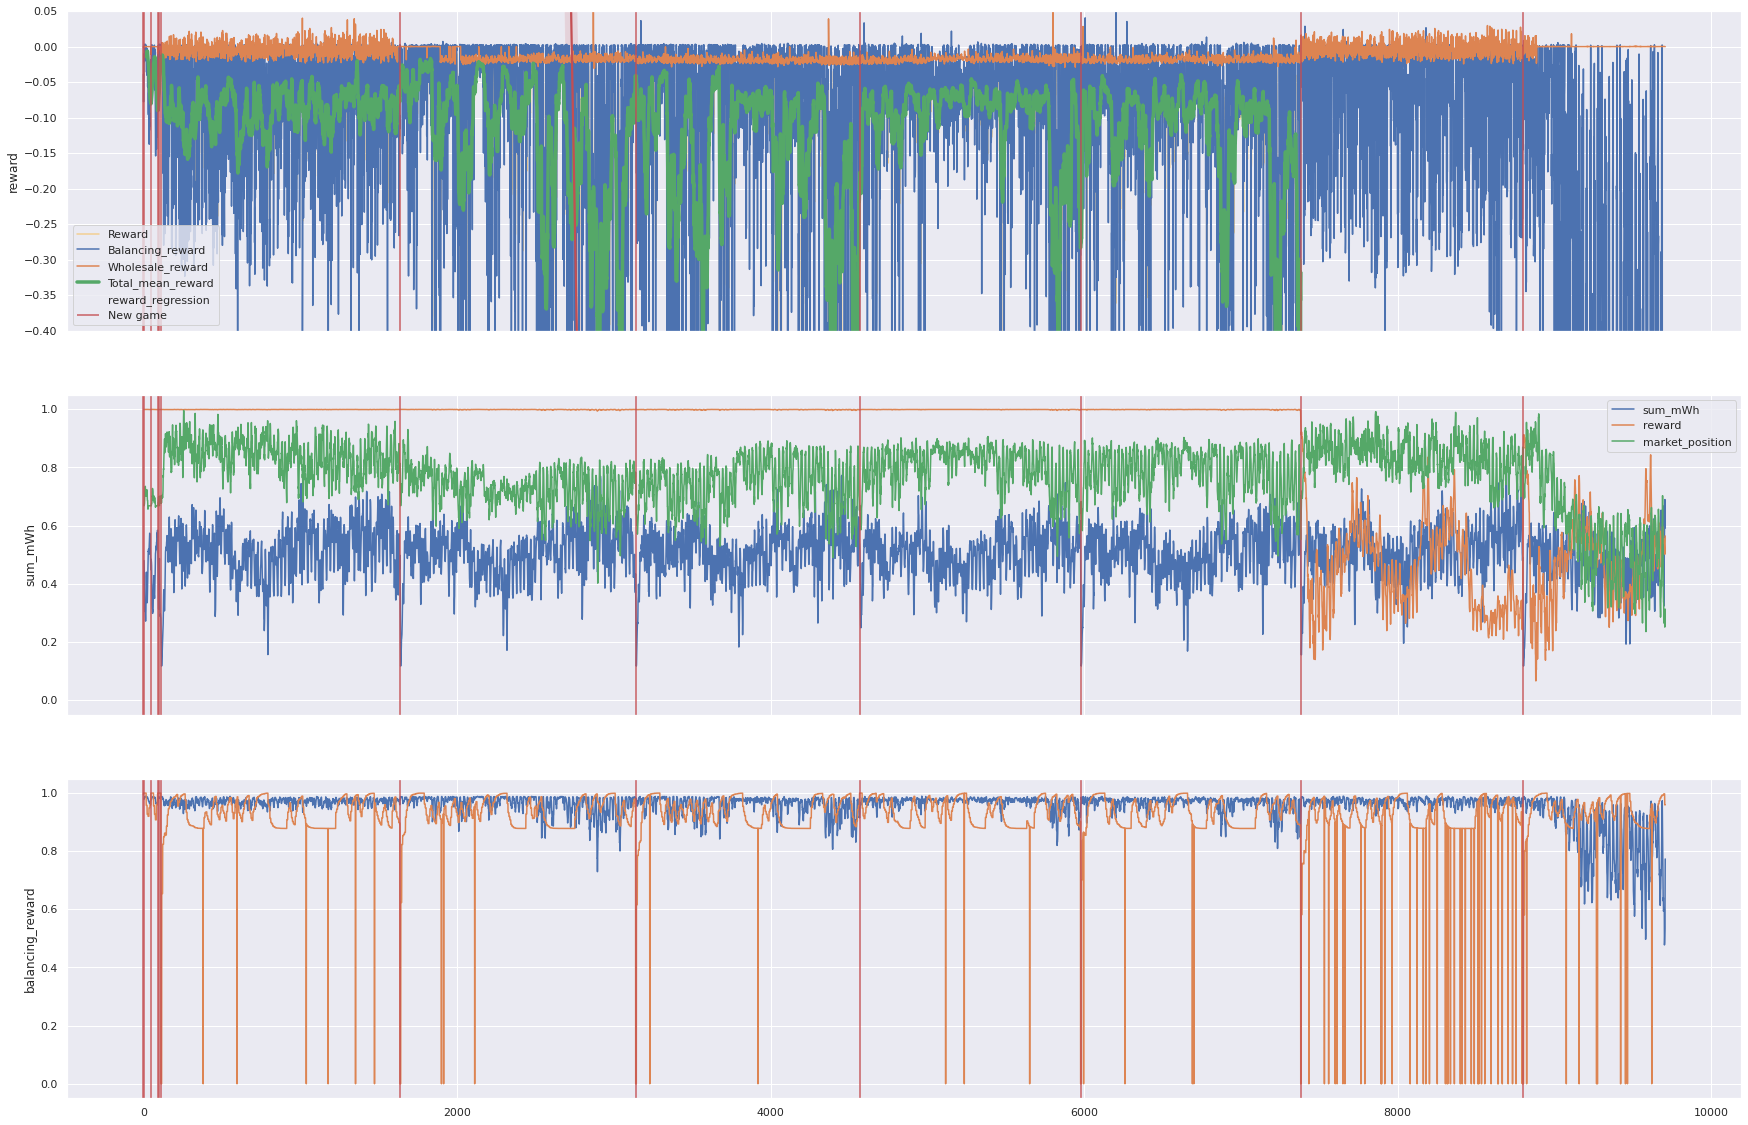

In [95]:

from cProfile import label


sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(3, 1, sharex=True)



#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")

graph7 = sns.lineplot(x=df.index, y=df["reward"].rolling(5).mean(), color="orange", ax=axs[0], alpha=0.4, label="Reward")

graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs[0], label="Balancing_reward")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs[0],label="Wholesale_reward")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs[0], label="Total_mean_reward", linewidth= 3.5)
graph8 = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, marker="", label="reward_regression", ax=axs[0])
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["sum_mWh"]).rolling(5).mean(), data=df, ax=axs[1], label="sum_mWh")
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[1], label="reward")
sns.lineplot(x=df.index, y=min_max_scaler(df["market_position_0"]).rolling(5).mean(), data=df, ax=axs[1], label="market_position")
sns.lineplot(x=df.index, y=min_max_scaler(df["balancing_reward"]).rolling(5).mean(), data=df, ax=axs[2])
sns.lineplot(x=df.index, y=min_max_scaler(df["customer_count"]), data=df, ax=axs[2])


for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            0,
            1,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )
axs[0].legend()
axs[1].set_ylabel("sum_mWh")
axs[0].set_ybound(-0.4,0.05)
f.set_figwidth(30)
f.set_figheight(20)


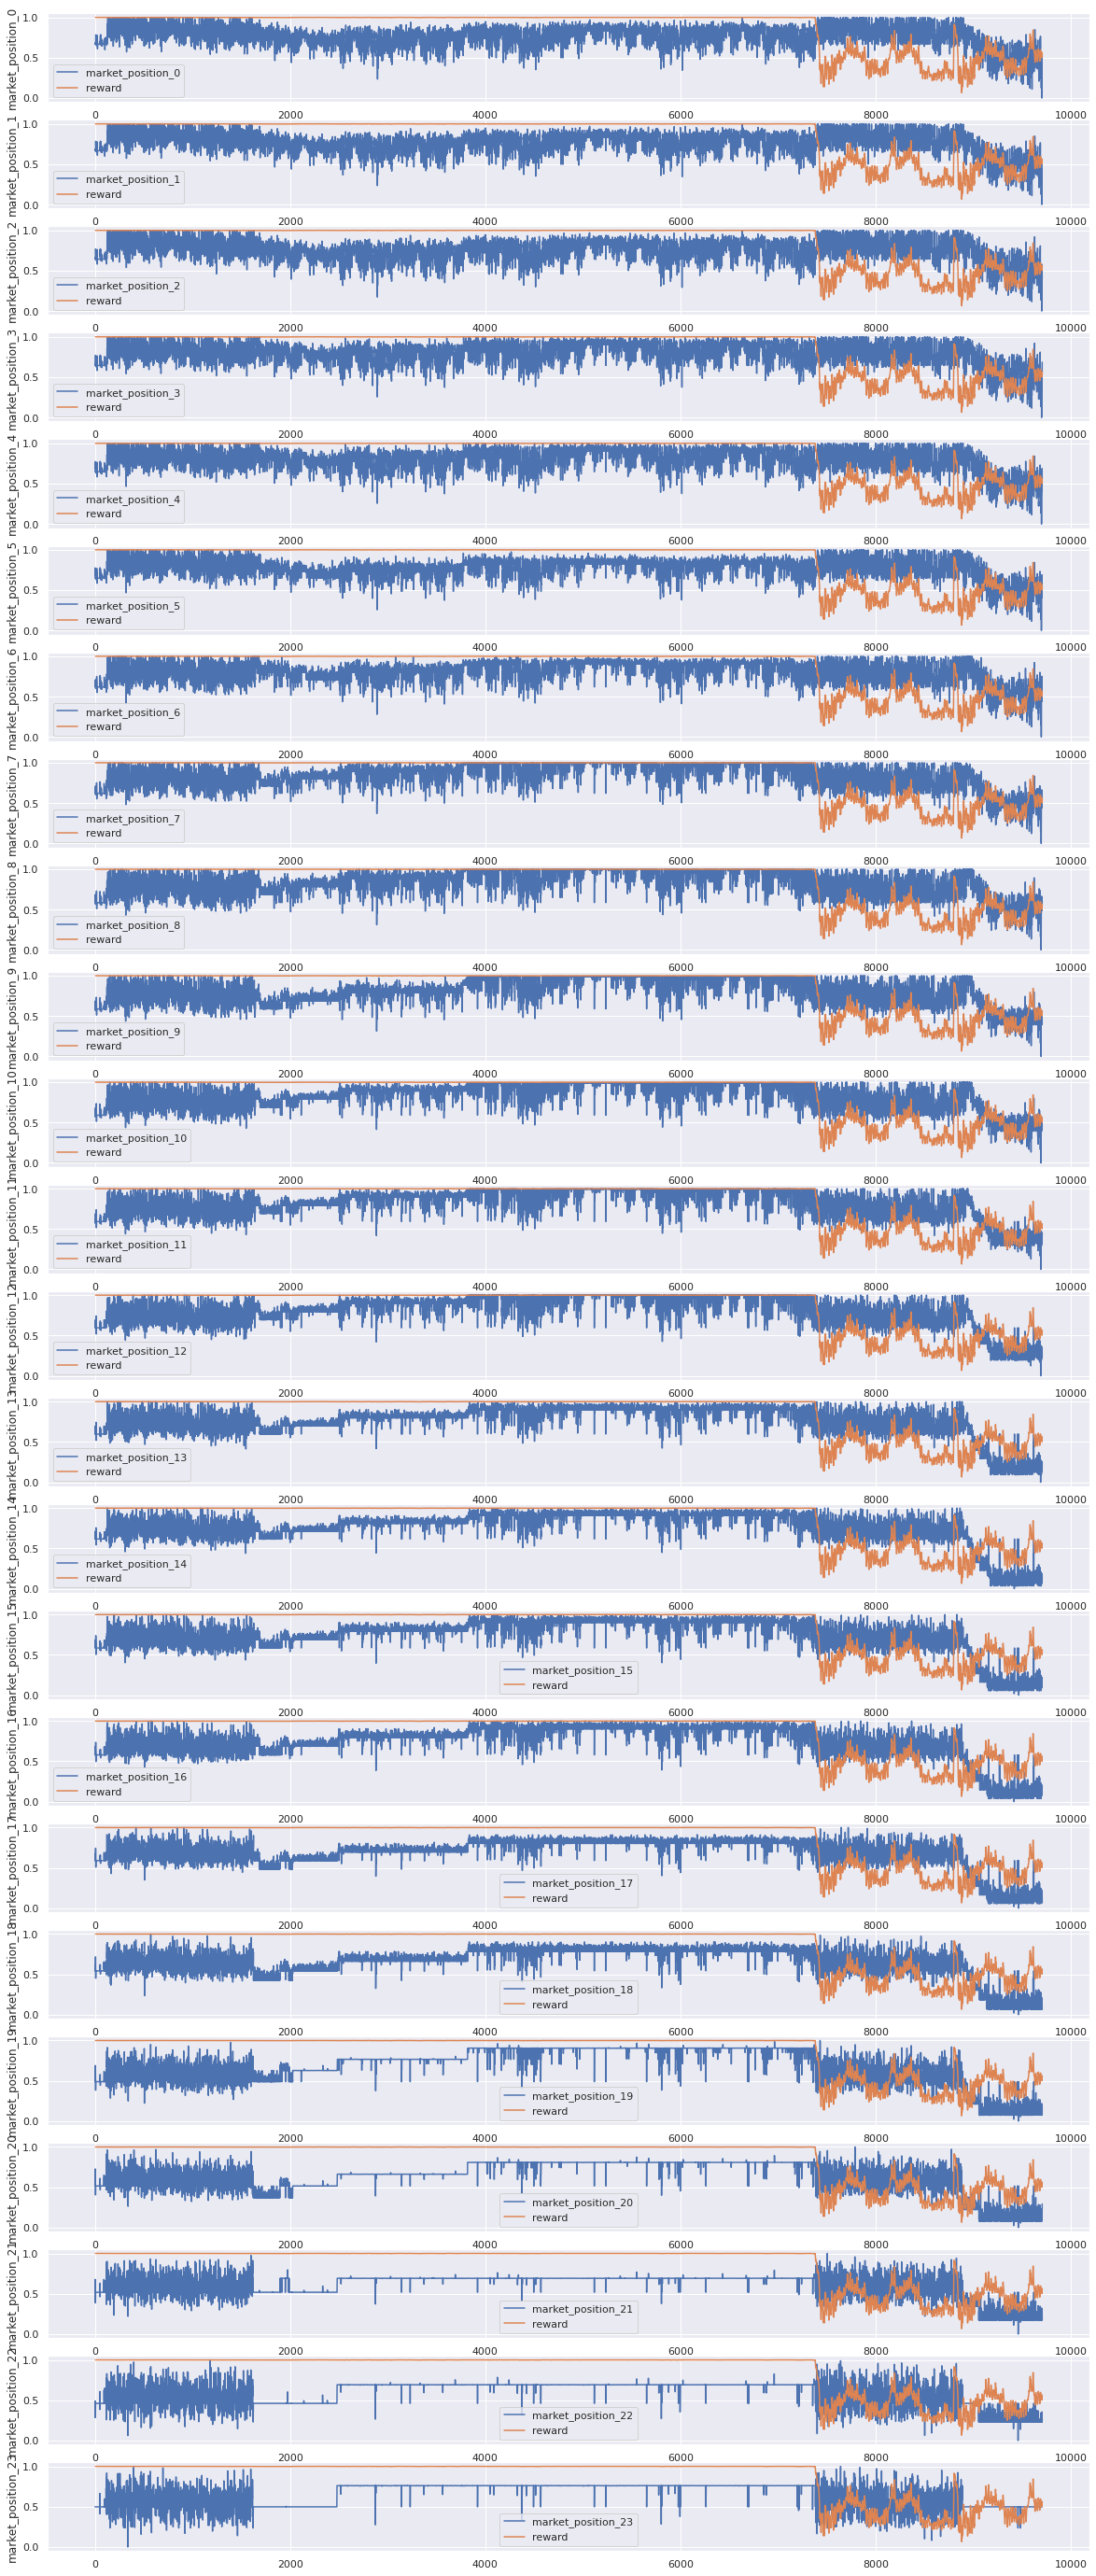

In [96]:
fig, axs = plt.subplots(24,1, sharey=True)
i=0
for col in df.columns:
    if "market" in col:
        sns.lineplot(x=df[col].index ,y=min_max_scaler(df[col]), data=df[col] , ax=axs[i], label=col)
        sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[i], label="reward")


        i+=1
        #axs[i].legend()

fig.set_figwidth(20)
fig.set_figheight(50)



<AxesSubplot:ylabel='reward'>

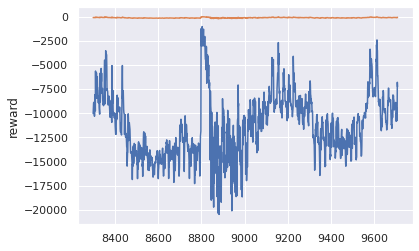

In [115]:
temp_df3 = df["p_customer_prosumption_0"] - df["market_position_0"]
temp_df3 =temp_df3.iloc[8300:]
sns.lineplot(x=temp_df3.index, y=temp_df3)
sns.lineplot(x=temp_df3.index, y= df["reward"].iloc[8300:])

In [117]:
df["market_position_0"]

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
9703   -312.254745
9704   -443.063489
9705   -201.485944
9706   -132.018766
9707    -89.663790
Name: market_position_0, Length: 9708, dtype: float64

In [99]:
for index, name in df[df["reward"] < 0.1].corr()["reward"].sort_values().iteritems():
    print(f"{index}, {name}")

energy_9, -0.6293460155460278
price_4, -0.6273803657843694
energy_24, -0.6177719100135018
energy_10, -0.6170649168786336
price_23, -0.5555026218246512
cleared_orders_energy_1, -0.5528975145719963
energy_6, -0.5518922730952374
energy_2, -0.5412140185034868
price_16, -0.5377971271748824
cleared_orders_energy_5, -0.5176590743866586
price_19, -0.5136187522254286
cleared_trade_energy_12, -0.5052990570414134
wholesale_reward, -0.4977238587284981
cleared_trade_energy_10, -0.49620698418468745
cleared_trade_price_5, -0.49555413353895744
cleared_orders_energy_12, -0.49310191336938203
cleared_orders_price_15, -0.4762862336405197
cleared_trade_energy_6, -0.4758565070547122
cleared_orders_price_18, -0.46591825737284215
cleared_trade_price_1, -0.46257495991364406
cleared_trade_energy_0, -0.46047043794611675
cleared_orders_energy_10, -0.45438877118762205
cleared_trade_energy_9, -0.4471070922415225
cleared_orders_price_3, -0.4440176548660975
cleared_trade_energy_16, -0.4388832897382967
energy_18, -0.4

In [100]:
df["gameId"]

0        game0
1        game1
2        game1
3        game1
4        game1
         ...  
9703    game11
9704    game11
9705    game11
9706    game11
9707    game11
Name: gameId, Length: 9708, dtype: object

In [101]:
# Or just use shift?
index_slot = 201
col_names_temp = ["reward", "customer_count"]
templist = []
for i in range(24):
    energy_price_bid = df.iloc[(index_slot - i)][[f"energy_{i+1}",f"price_{i+1}"]].values
    trade_result = df.iloc[index_slot - i-1][[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"]].values
    market_position = df.iloc[index_slot -i][f"market_position_{i}"]
    sum_mwh = df.iloc[index_slot]["sum_mWh"]
    index_slot_list = df.iloc[index_slot-i].name
    predicted_prosumption=df.iloc[index_slot-i][f"p_customer_prosumption_{i}"]/1000
    #if i = 0:
    #    trade_result[0] = df.iloc[timeslot]["final"]
    templist.append([*energy_price_bid, *trade_result, market_position, sum_mwh, index_slot_list, predicted_prosumption])

df_action_analysis = pd.DataFrame(templist, columns=["energy_action", "price_action", "energy_orders_energy", "price_orders_energy", "market_position", "sum_mWh", "index_slot", "predicted_prosumption"])
df_action_analysis

,energy_action,price_action,energy_orders_energy,price_orders_energy,market_position,sum_mWh,index_slot,predicted_prosumption
0,-25.921714,86.020470,-0.433160,30.631956,161.501098,59.91215,201,-14.148104
1,-11.831129,32.646275,0.521249,-93.451028,161.501098,59.91215,200,-8.722049
2,47.170424,-11.726046,0.000000,0.000000,161.934258,59.91215,199,-5.998233
3,-36.509609,45.729935,0.670498,-11.036754,160.636653,59.91215,198,-7.265108
4,47.213626,-42.988002,-0.294479,31.872196,160.636653,59.91215,197,-5.049938
5,-13.355100,68.730366,28.874434,-85.629521,159.966154,59.91215,196,-3.738226
6,39.977360,-66.173291,0.000000,0.000000,160.260634,59.91215,195,-4.324356
7,31.095588,-93.720996,10.388287,-81.073553,131.386200,59.91215,194,-4.288638
8,-9.840345,81.201696,10.311353,-64.001467,131.386200,59.91215,193,-5.148312
9,-2.913988,75.407290,0.000000,0.000000,90.379685,59.91215,192,-4.083366


In [102]:
df_action_analysis.style.background_gradient(cmap="bwr")

,energy_action,price_action,energy_orders_energy,price_orders_energy,market_position,sum_mWh,index_slot,predicted_prosumption
0,-25.921714,86.020470,-0.433160,30.631956,161.501098,59.912150,201,-14.148104
1,-11.831129,32.646275,0.521249,-93.451028,161.501098,59.912150,200,-8.722049
2,47.170424,-11.726046,0.000000,0.000000,161.934258,59.912150,199,-5.998233
3,-36.509609,45.729935,0.670498,-11.036754,160.636653,59.912150,198,-7.265108
4,47.213626,-42.988002,-0.294479,31.872196,160.636653,59.912150,197,-5.049938
5,-13.355100,68.730366,28.874434,-85.629521,159.966154,59.912150,196,-3.738226
6,39.977360,-66.173291,0.000000,0.000000,160.260634,59.912150,195,-4.324356
7,31.095588,-93.720996,10.388287,-81.073553,131.386200,59.912150,194,-4.288638
8,-9.840345,81.201696,10.311353,-64.001467,131.386200,59.912150,193,-5.148312
9,-2.913988,75.407290,0.000000,0.000000,90.379685,59.912150,192,-4.083366


In [103]:
i = 0
index_slot = 201
df.iloc[index_slot][[*[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"], f"market_position_{i}", "sum_mWh", f"p_customer_prosumption_{i}"]]
#[*[f"sum_mWh", "price_1"], *["price_2", "test3"]]
#[*["test", "test2"],*["test3", "test4"]]
df["cleared_orders_energy_4"]

0        0.000000
1        0.000000
2        0.000000
3       32.659565
4        0.000000
          ...    
9703   -49.961044
9704   -49.653011
9705   -49.547977
9706   -49.621696
9707   -49.605087
Name: cleared_orders_energy_4, Length: 9708, dtype: float64

In [104]:
df[["price_24","energy_24"]].iloc[177]

price_24    -30.578804
energy_24     2.180445
Name: 177, dtype: float64

In [105]:
a = df.iloc[df.index <201][[x for x in df.columns if (x.startswith("energy_") | (x.startswith("price_")))]]
a.iloc[a.index > 170].T

,171,172,173,174,175,176,177,178,179,180,...,191,192,193,194,195,196,197,198,199,200
energy_1,-32.723570,-41.732228,-28.025877,48.595643,39.205539,-23.221159,-25.518298,-21.246684,18.420970,44.427943,...,-6.910205,31.726360,-16.229892,10.936809,20.450139,-9.027064,34.961867,-35.834146,-45.981324,-27.931869
price_1,86.679399,94.323766,88.440537,-48.530579,-20.846975,6.915307,16.472256,40.283608,-91.819298,-40.426791,...,1.571572,-44.297981,85.735691,-31.976378,-15.304041,21.850610,-78.356469,25.526631,92.813325,79.675400
energy_2,29.980552,-25.960302,-36.165595,-14.867687,-35.567188,26.418340,44.523704,-33.328342,45.570683,0.348938,...,-12.758029,-5.563784,-47.101355,-6.814039,0.211692,46.102130,1.297605,-19.862854,49.582875,-11.831129
price_2,-10.402656,38.900495,45.651579,22.237360,91.870952,-88.162768,-42.031145,79.668581,-16.414881,-58.010113,...,63.331115,41.519177,8.865047,67.521644,-48.531008,-71.395838,-93.482268,70.310771,-8.760357,32.646275
energy_3,-25.816977,-26.833522,-32.615554,0.264120,-29.896939,-30.020380,17.981577,-1.080585,-27.630901,41.472781,...,-29.695785,-29.139698,-26.953793,47.277212,27.241337,-24.015188,-43.830419,30.704546,47.170424,-23.120880
price_3,31.529844,58.608413,24.570048,-5.224168,40.021253,74.485064,-5.795228,26.292431,84.847569,-73.404837,...,44.982731,88.833869,37.498689,-34.563124,-14.950907,58.964288,16.651177,-84.311020,-11.726046,17.883146
energy_4,-8.849335,-36.466563,9.281397,23.747051,33.106327,45.372379,9.889317,-9.711087,1.433039,29.487634,...,-4.829025,-21.252263,-42.898595,6.711686,18.492818,44.362652,26.794028,-36.509609,-8.081961,-49.547863
price_4,30.424237,13.762677,-26.387072,-21.795344,-89.630723,-71.510732,-18.736851,13.891160,-41.389787,-52.711475,...,21.456504,13.534832,36.608231,-39.760888,-13.244104,-57.599068,-36.794078,45.729935,64.716160,63.747704
energy_5,1.261902,-3.852129,3.332341,-25.545442,32.767987,14.512539,-35.301983,45.596933,26.566362,2.947760,...,-1.870155,-1.692438,4.167545,-0.439966,-33.887935,49.045086,47.213626,-5.425179,-21.682131,28.220975
price_5,-65.170383,29.009891,-10.016751,27.209890,-49.047434,-90.624154,36.830509,-33.569217,-85.640728,-7.879305,...,49.528790,30.047417,-4.893327,26.560163,98.544323,-88.878429,-42.988002,93.947494,95.560992,-67.443550


In [106]:
energy_price_bid

array([-13.153719902038574, 75.86708068847656], dtype=object)

In [107]:
for index, value in df[df.columns.difference(pd.Index(["gameId"]))].corr()["reward"].sort_values().iteritems():
    
    print(index, value)

energy_9 -0.6293460155460278
price_4 -0.6273803657843694
energy_24 -0.6177719100135018
energy_10 -0.6170649168786336
price_23 -0.5555026218246512
cleared_orders_energy_1 -0.5528975145719963
energy_6 -0.5518922730952374
energy_2 -0.5412140185034868
price_16 -0.5377971271748824
cleared_orders_energy_5 -0.5176590743866586
price_19 -0.5136187522254286
cleared_trade_energy_12 -0.5052990570414134
wholesale_reward -0.4977238587284981
cleared_trade_energy_10 -0.49620698418468745
cleared_trade_price_5 -0.49555413353895744
cleared_orders_energy_12 -0.49310191336938203
cleared_orders_price_15 -0.4762862336405197
cleared_trade_energy_6 -0.4758565070547122
cleared_orders_price_18 -0.46591825737284215
cleared_trade_price_1 -0.46257495991364406
cleared_trade_energy_0 -0.46047043794611675
cleared_orders_energy_10 -0.45438877118762205
cleared_trade_energy_9 -0.4471070922415225
cleared_orders_price_3 -0.4440176548660975
cleared_trade_energy_16 -0.4388832897382967
energy_18 -0.4387971432401579
cleared_or

In [108]:
df2 = pd.DataFrame()
df2["predicted_consumption_mWh"] = df["p_customer_prosumption_0"] /-1000
df2["timeslot"] = df["timeslot"]
df2["market_position_0"] = df["market_position_0"]
df2["sum_mWh"] = df["sum_mWh"]
df2["error_prediction"] = abs(df2["sum_mWh"]) - df2["predicted_consumption_mWh"]
df2

,predicted_consumption_mWh,timeslot,market_position_0,sum_mWh,error_prediction
0,14.192461,450,0.000000,47.426888,33.234427
1,1.796747,362,0.000000,62.320938,60.524191
2,2.835879,363,0.000000,41.161287,38.325408
3,1.916076,364,0.000000,43.293748,41.377672
4,2.440343,365,0.000000,26.631083,24.190740
...,...,...,...,...,...
9703,10.292166,1266,-312.254745,68.738667,58.446501
9704,9.891623,1267,-443.063489,60.300990,50.409367
9705,10.956682,1268,-201.485944,63.274839,52.318157
9706,6.921587,1269,-132.018766,49.304711,42.383124


### Action analysis

In [109]:
#f,axs = plt.subplots(1,1,figsize=(25,25))
#for i in range(1):
    #ax = sns.scatterplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
#    ax = sns.histplot(x=df[f"price_{i+1}"], y=df[f"energy_{i+1}"], data=df, hue="balancing_reward", ax=axs)
    

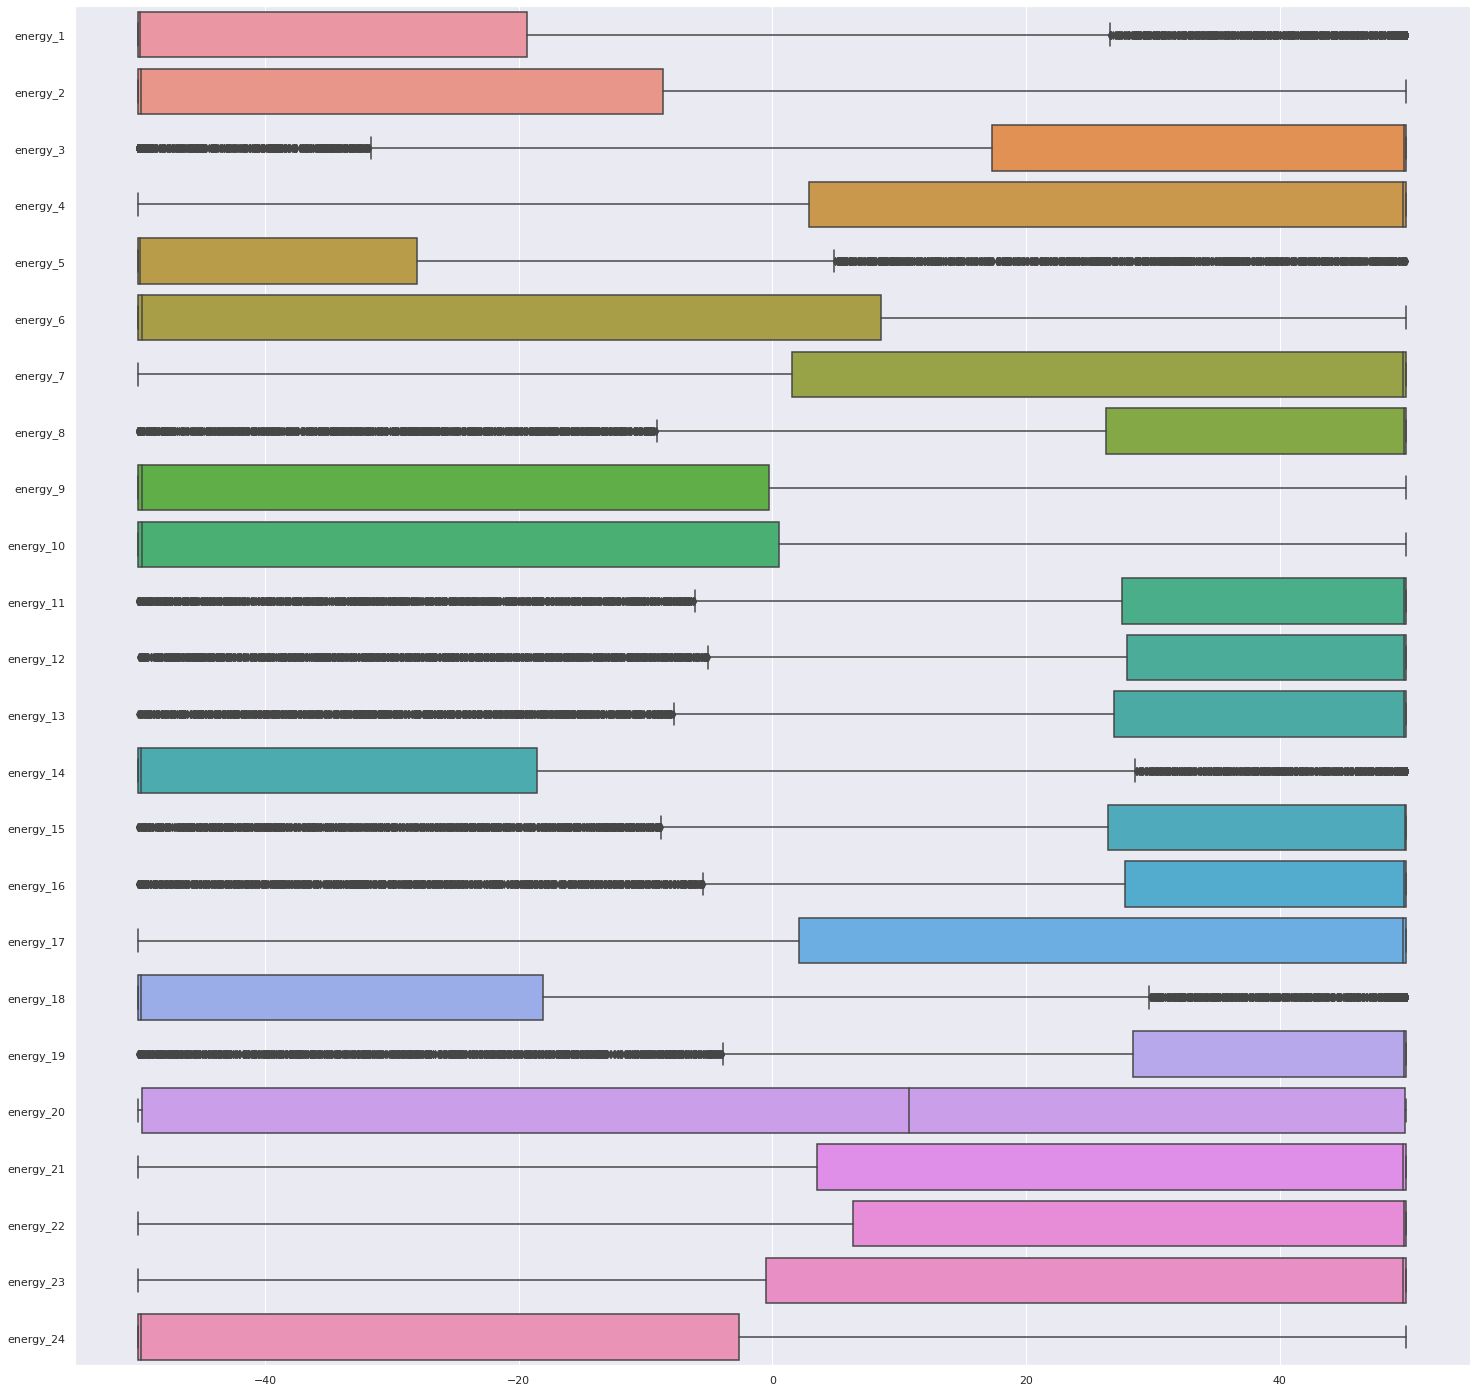

In [110]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[energy], orient="h")

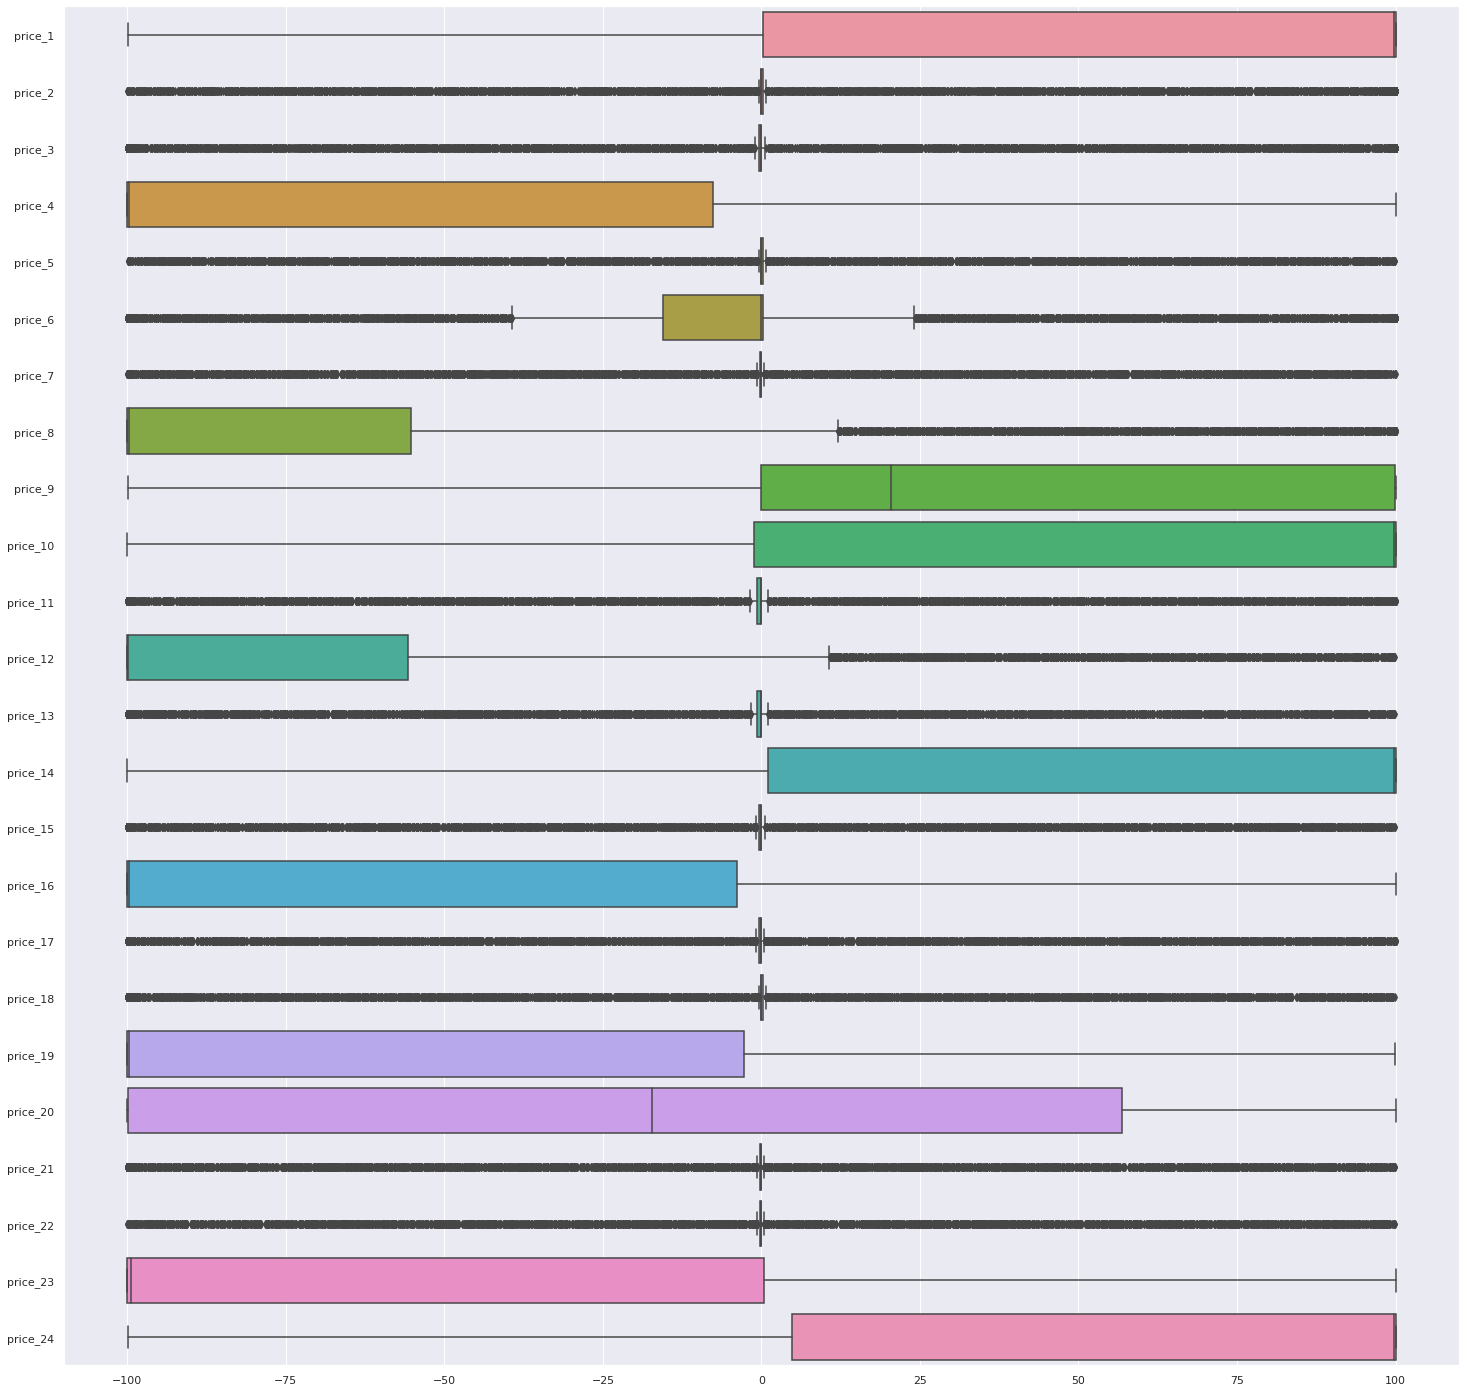

In [111]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[price],  orient="h")

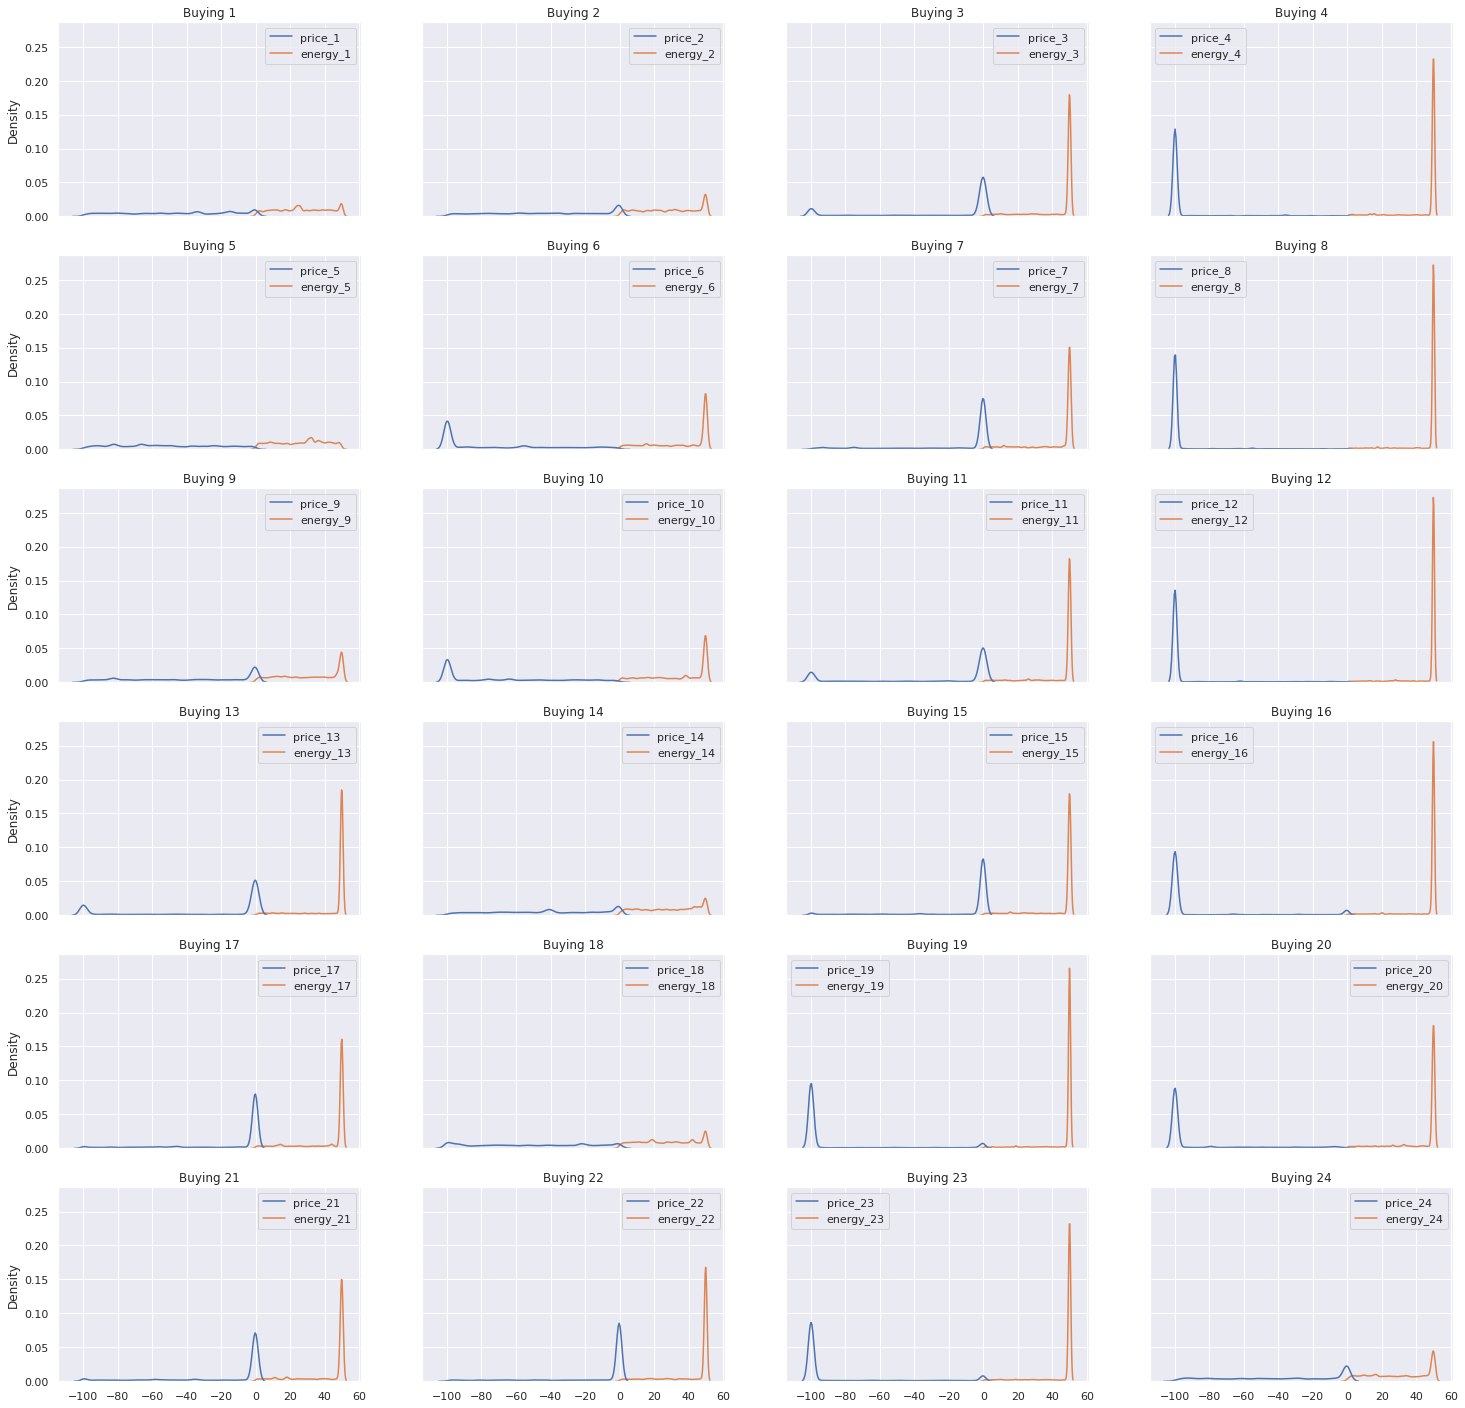

In [112]:
f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)

for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]<0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Buying {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)


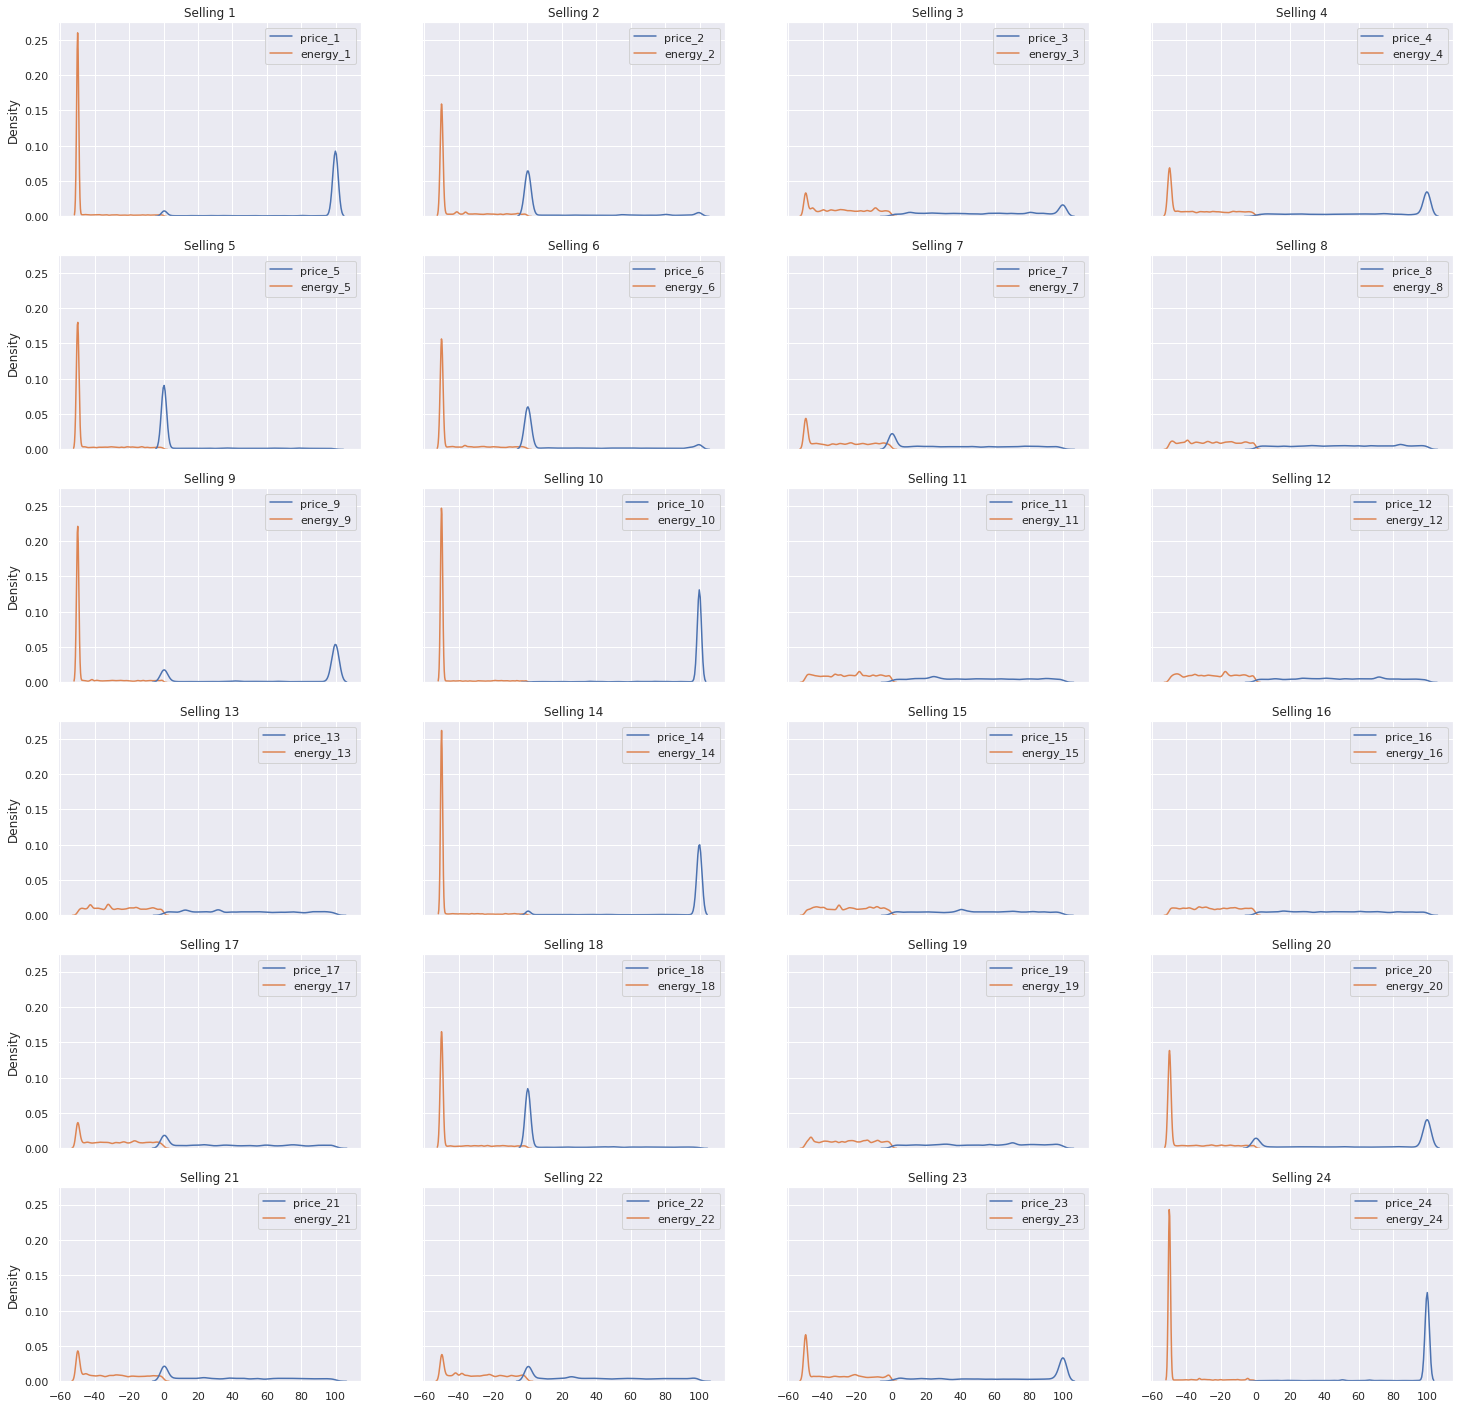

In [113]:
# Selling
from matplotlib.pyplot import title


f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)
for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]>0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Selling {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)